# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *GaussianConvolution*
Filter an image by the convolution of a Gaussian function  
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF
from ConvolutionUtilities import applyKernel
from PlotUtilities import plotColorSurface, plot3DColorHistogram
from PrintUtilities import printImageRangeF

# Math and iteration
from math import pow, exp
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel
    sigma = Standard deviation

In [2]:
imageName = "Giraffe.png"
kernelSize = 9
sigma = 3.0

### Read and show input image

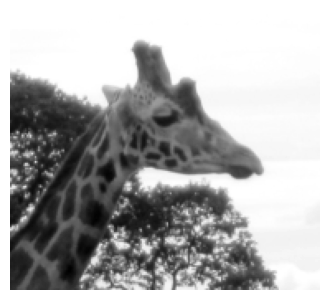

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create Gaussian kernel image

In [4]:
# Create image to store kernel 
kernelImage = createImageF(kernelSize, kernelSize)

# Three float array to store colors to be used in the surface plot
colorsRGB = createImageF(kernelSize, kernelSize, 3)

# Set the pixels of Gaussian kernel
centre = (kernelSize - 1) / 2
sumValues = 0
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):
    kernelImage[y,x] = exp( -0.5 * (pow((x - centre)/sigma, 2.0) +    \
                                    pow((y - centre)/sigma, 2.0)) ) 
    sumValues += kernelImage[y,x] 
     
    # This is only set for the plot
    colorsRGB[y,x] = [kernelImage[y,x], kernelImage[y,x], kernelImage[y,x]]

# Normalisation
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):
    kernelImage[y,x] /= sumValues

### Show the kernel as a function and as an histogram

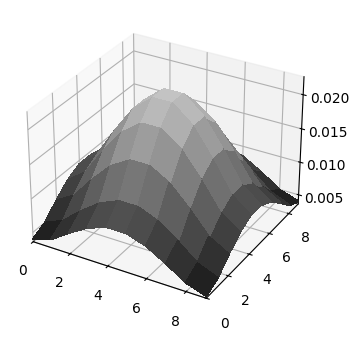

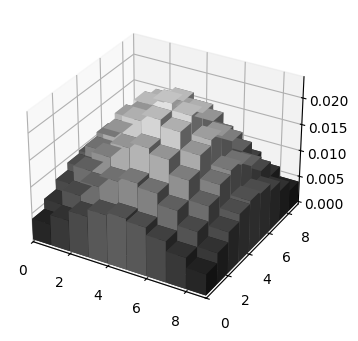

In [5]:
plotColorSurface(kernelImage, colorsRGB)
plot3DColorHistogram(kernelImage, colorsRGB)

### Print kernel values

In [6]:
printImageRangeF(kernelImage, [0, kernelSize-1], [0, kernelSize-1], '7.3')



[ 0.00397 0.00585 0.00772 0.00912 0.00965 0.00912 0.00772 0.00585 0.00397 ]
[ 0.00585 0.00863  0.0114  0.0135  0.0142  0.0135  0.0114 0.00863 0.00585 ]
[ 0.00772  0.0114   0.015  0.0178  0.0188  0.0178   0.015  0.0114 0.00772 ]
[ 0.00912  0.0135  0.0178   0.021  0.0222   0.021  0.0178  0.0135 0.00912 ]
[ 0.00965  0.0142  0.0188  0.0222  0.0235  0.0222  0.0188  0.0142 0.00965 ]
[ 0.00912  0.0135  0.0178   0.021  0.0222   0.021  0.0178  0.0135 0.00912 ]
[ 0.00772  0.0114   0.015  0.0178  0.0188  0.0178   0.015  0.0114 0.00772 ]
[ 0.00585 0.00863  0.0114  0.0135  0.0142  0.0135  0.0114 0.00863 0.00585 ]
[ 0.00397 0.00585 0.00772 0.00912 0.00965 0.00912 0.00772 0.00585 0.00397 ]


### Apply kernel

In [7]:
outputImage =  applyKernel(inputImage, kernelImage)

### Show filtered image

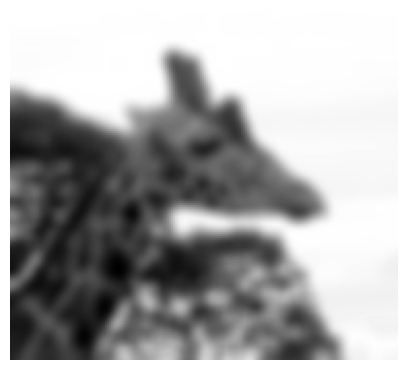

In [8]:
plotImageL(outputImage)